In [1]:
# Basic librairies (all the librairies used for the machine learning are imported in the tools.py file)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ardl import ARDL
from pmdarima.preprocessing import BoxCoxEndogTransformer
from pmdarima.pipeline import Pipeline

from warnings import filterwarnings

from pmdarima.utils import tsdisplay
filterwarnings('ignore')

In [2]:
# Import all functions we build to process our predictions. All the functions are in the DreamLib folder
from DreamLib.processing_datas import *
from DreamLib.timeseries import *
import datas.selected_columns as cl

In [3]:
# Data importation
data = pd.read_sas("datas/total_red.sas7bdat")
# Useful to plot the model 
index = data.set_index('TRIMESTRE').index.unique()

# Functions

# Focus on chronique total

Then for chronique totale we will build and plot all models for each type of features selection.

In [14]:
start = 1
chronique = b"Totale"
period = 36

## With col_totale_corr

For the correlation feature selection we clean the data, build and find the best ARIMA model.

In [15]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start, period=period, chronique=chronique,col_used=cl.col_totale_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.42
P-value for the series y_diff2: 0.0103
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



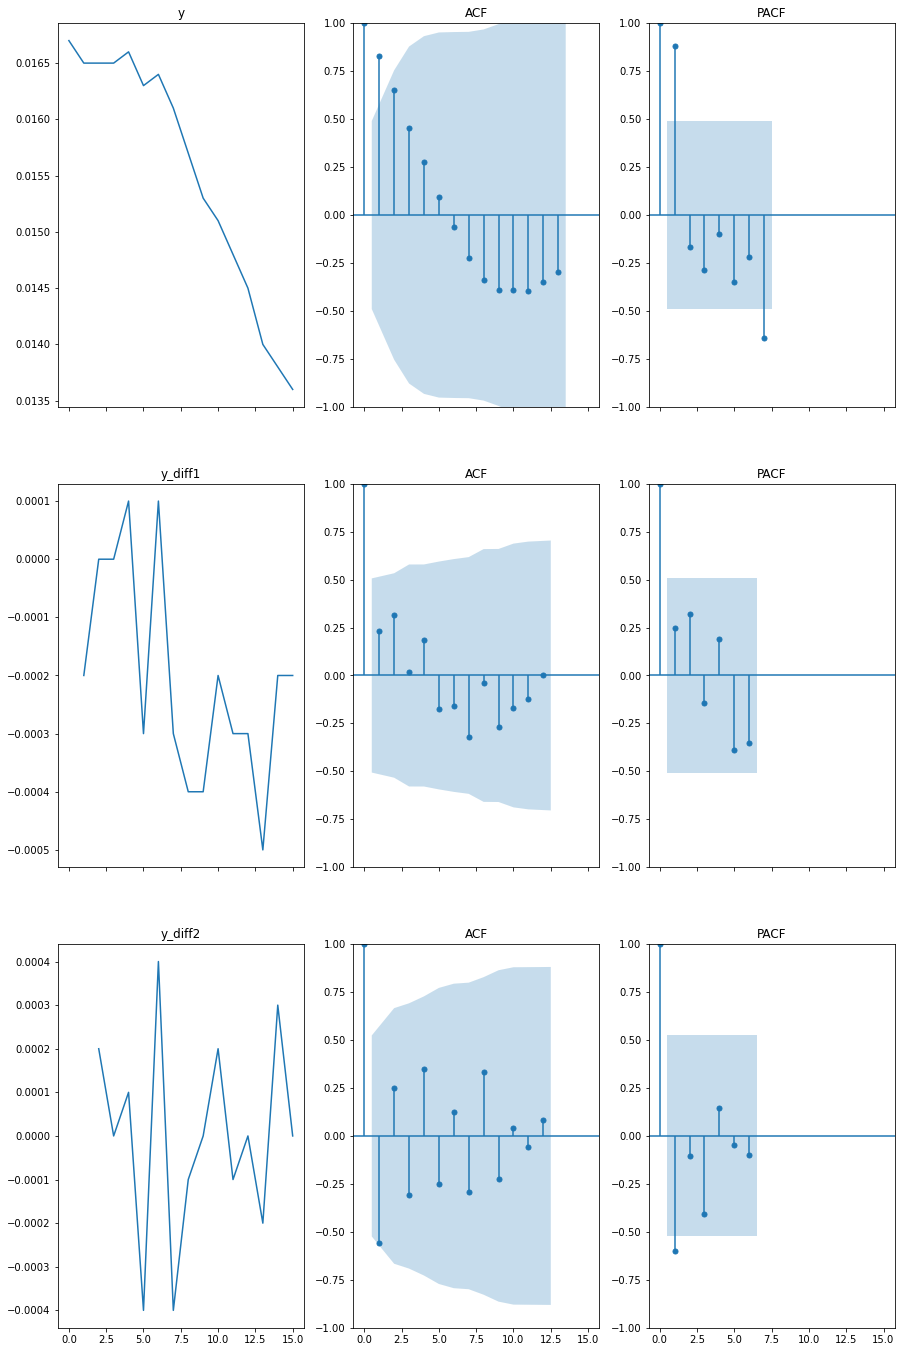

2

In [16]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff2: -3.42
P-value for the series y_diff2: 0.0103
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-245.786, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-253.786, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-251.455, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-251.526, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-255.786, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-249.574, Time=0.08 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.459 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 147.893
D

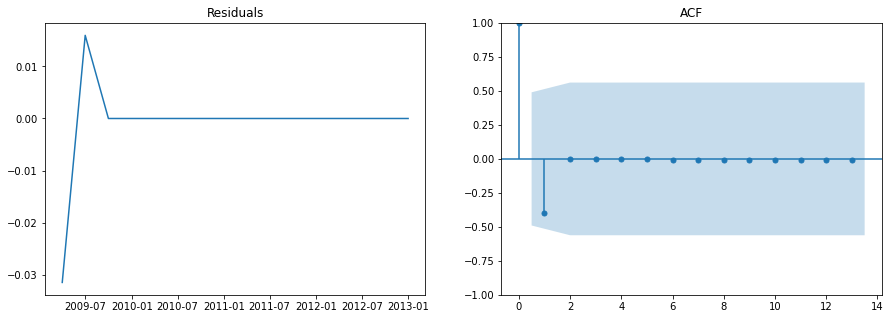


Test statistic for the residuals: -26.08
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



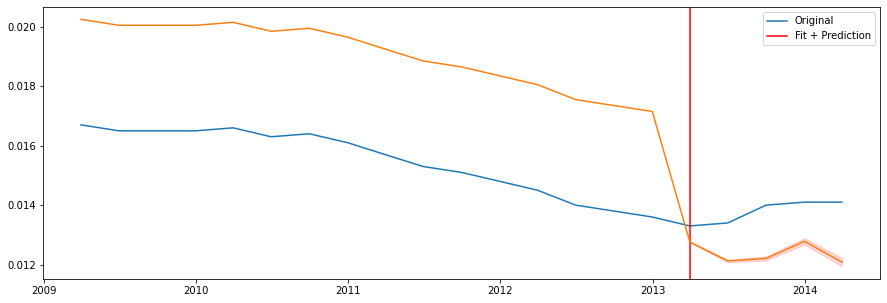

In [17]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_low_var

For the low variance feature selection we clean the data, build and find the best ARIMA model.

In [18]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period, chronique=chronique,col_used=cl.col_totale_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.42
P-value for the series y_diff2: 0.0103
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-217.786, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-225.786, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-223.786, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-223.786, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-227.786, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-221.786, Time=0.12 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.720 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 147.893
D

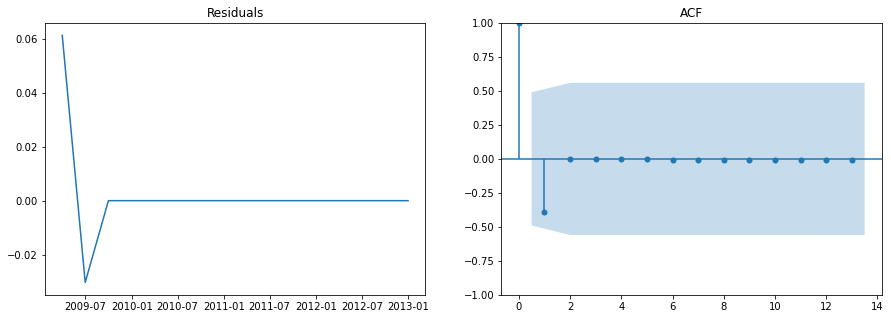


Test statistic for the residuals: -26.995
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



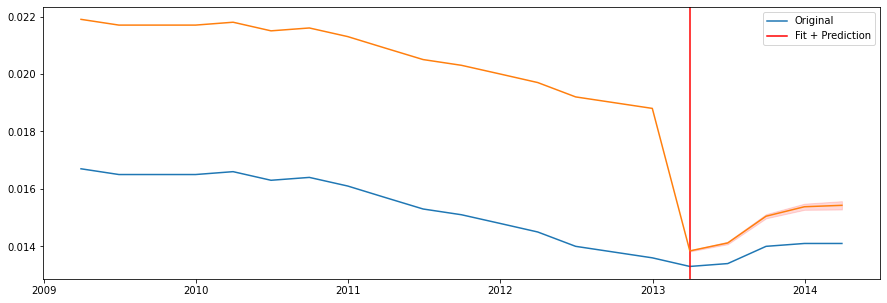

In [19]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_kbest

For the kbest feature selection we clean the data, build and find the best ARIMA model.

In [22]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period, chronique=chronique,col_used=cl.col_totale_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.42
P-value for the series y_diff2: 0.0103
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-75.092, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-251.786, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=23.765, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-81.141, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-253.786, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-79.363, Time=0.19 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.778 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 147.893
Date: 

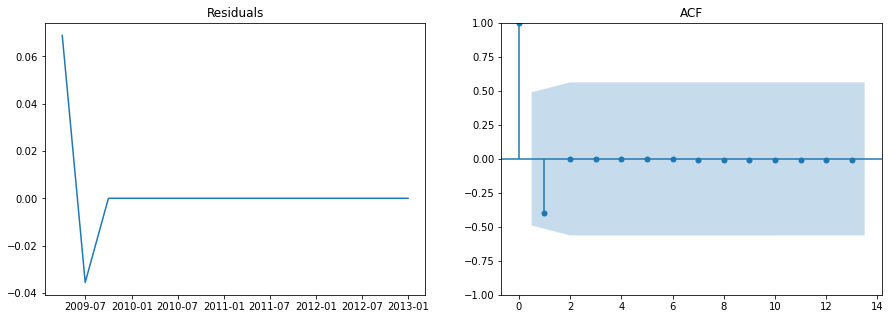


Test statistic for the residuals: -3.05
P-value for the residuals: 0.0305
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



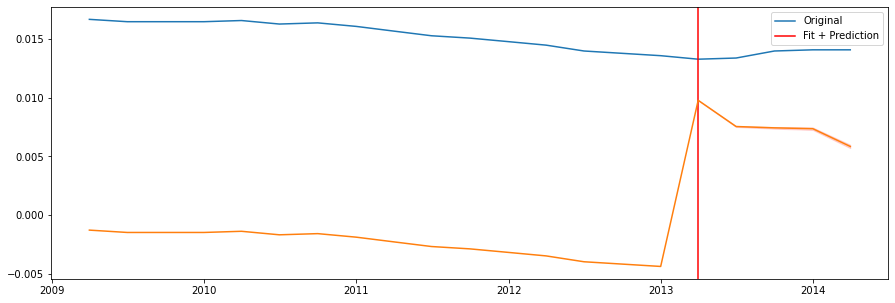

In [23]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_recur

For the recursive feature selection we clean the data, build and find the best ARIMA model.

In [24]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start, period=period,chronique=chronique,col_used=cl.col_totale_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.42
P-value for the series y_diff2: 0.0103
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-242.218, Time=0.30 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.306 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 148.109
Date:                Mon, 12 De

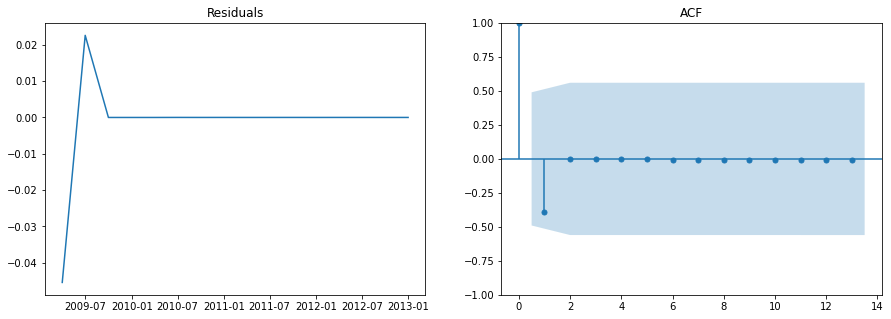


Test statistic for the residuals: -26.799
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



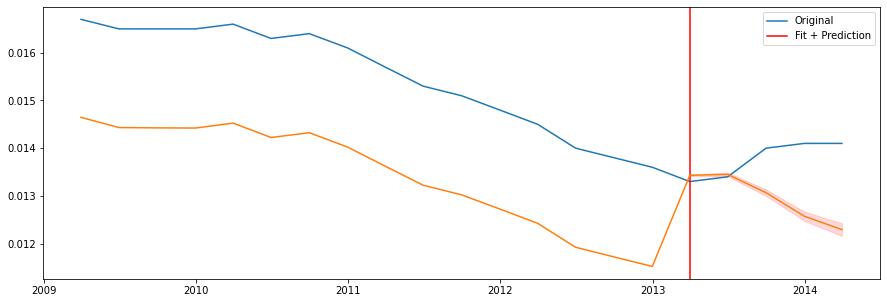

In [25]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_sfm

For the select from model feature selection we clean the data, build and find the best ARIMA model.

In [26]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.42
P-value for the series y_diff2: 0.0103
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-249.786, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-257.786, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-255.786, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-255.786, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-259.786, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-253.786, Time=0.08 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.433 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 147.893
D

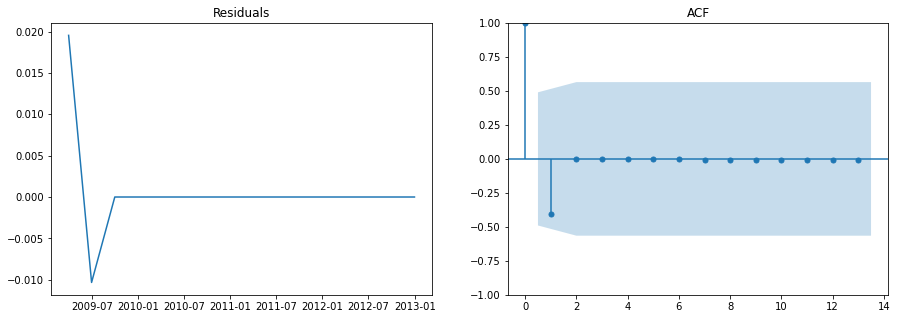


Test statistic for the residuals: -24.63
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



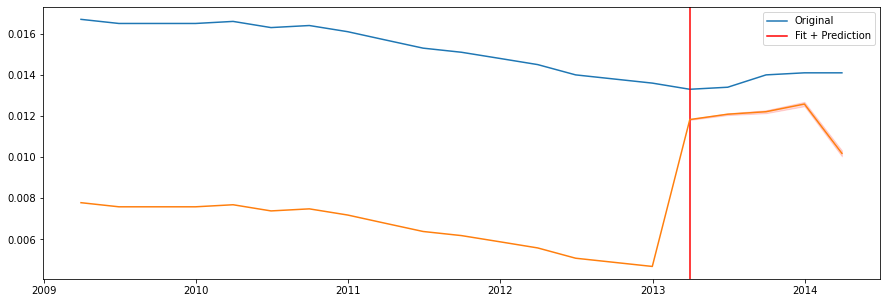

In [27]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_tree

For the tree-based feature selection we clean the data, build and find the best ARIMA model.

In [28]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.42
P-value for the series y_diff2: 0.0103
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-235.786, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-243.786, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-241.786, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-241.786, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-245.786, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-239.786, Time=0.10 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.543 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 147.893
D

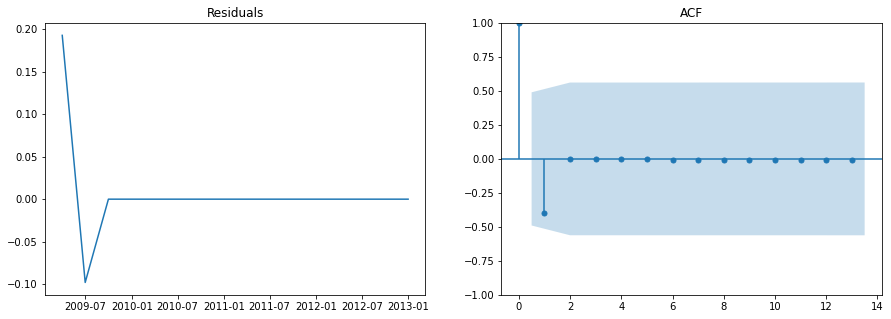


Test statistic for the residuals: -25.985
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



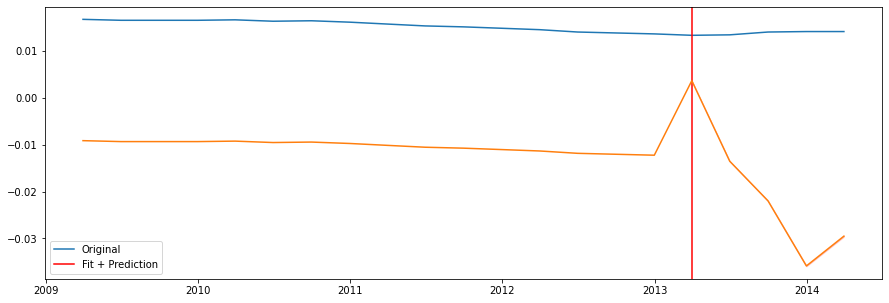

In [29]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_seq_for

For the sequential feature selection we clean the data, build and find the best ARIMA model.

In [30]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.42
P-value for the series y_diff2: 0.0103
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-243.786, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-251.786, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-249.786, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-249.786, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-253.786, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-247.786, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.476 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 147.893
D

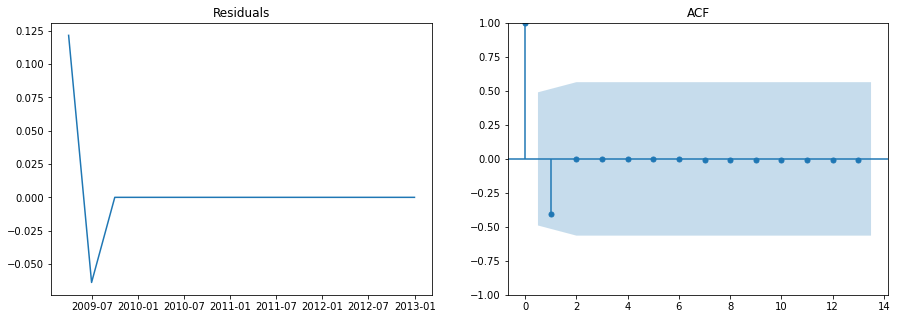


Test statistic for the residuals: -2.269
P-value for the residuals: 0.18206
The residuals are not stationary. We accept the hypothesis of a unit root.



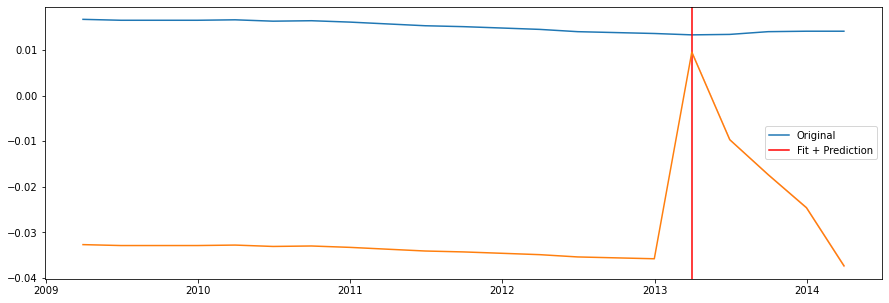

In [31]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

## With col_totale_seq_bac

For the backward feature selection we clean the data, build and find the best ARIMA model.

In [32]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_totale_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -3.42
P-value for the series y_diff2: 0.0103
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-243.786, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-251.786, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-249.786, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-249.786, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-253.786, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-247.786, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.497 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 147.893
D

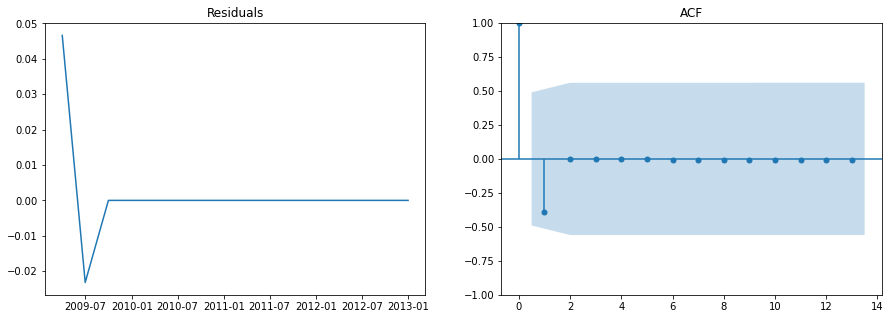


Test statistic for the residuals: -1.605
P-value for the residuals: 0.48119
The residuals are not stationary. We accept the hypothesis of a unit root.



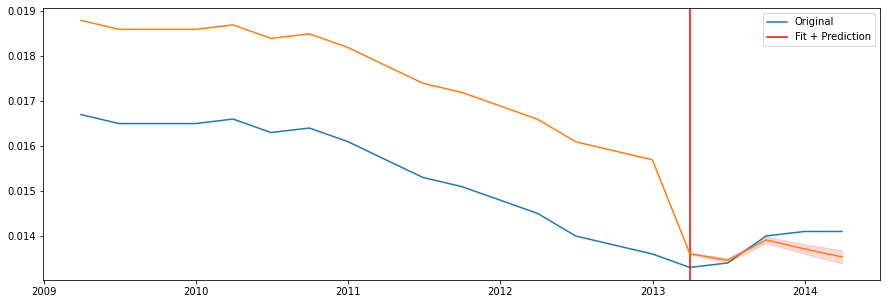

In [33]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,2,0)
$$

# Focus on chronique CHR2

Then for chronique CHR2 we will build and plot all models for each type of features selection.

In [64]:
start = 1
period = 36
chronique = b"CHR2"

## With col_totale_corr

In [65]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.285
P-value for the series y_diff1: 0.01558
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



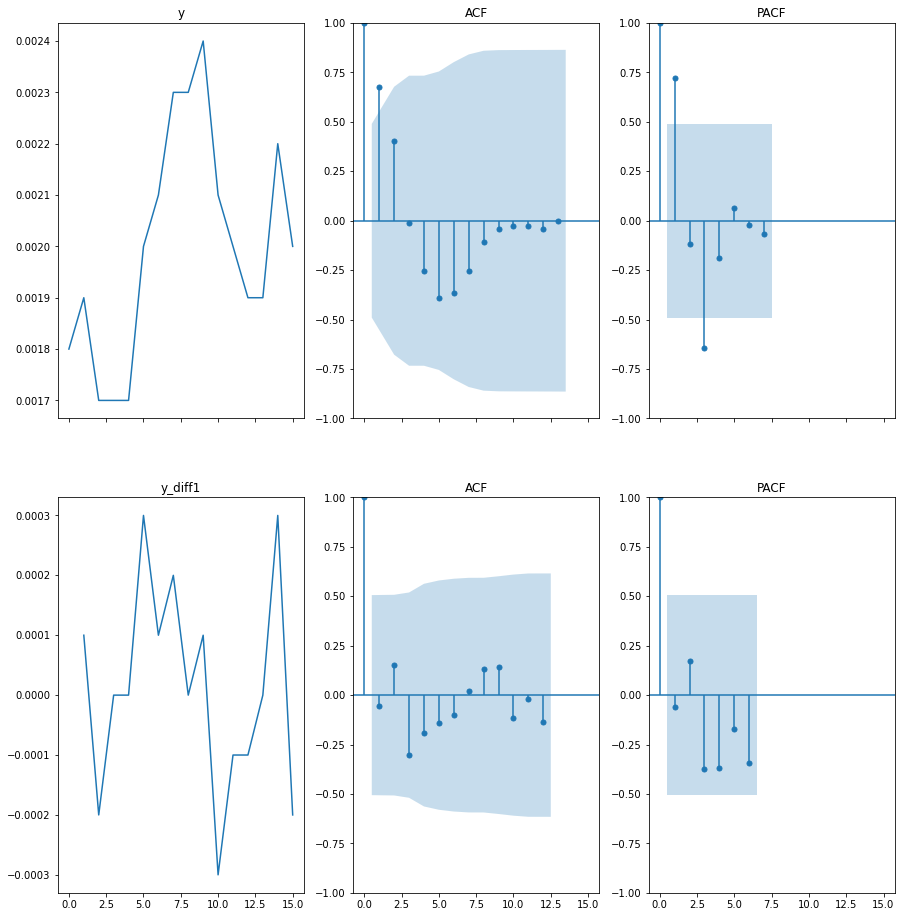

1

In [66]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff1: -3.285
P-value for the series y_diff1: 0.01558
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-198.837, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-207.081, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-205.106, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-204.891, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-182.401, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-203.287, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.276 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 110.541

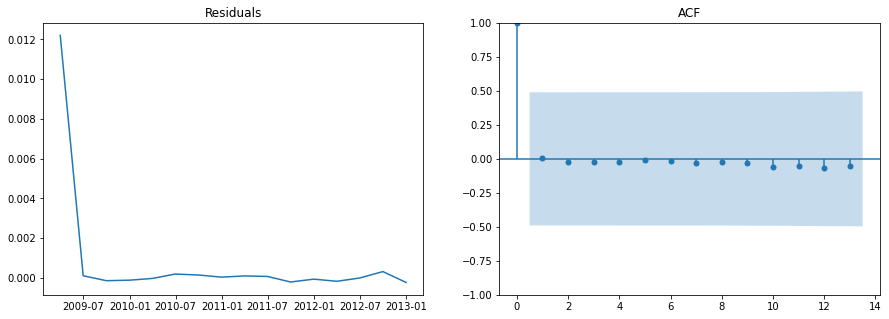


Test statistic for the residuals: -1.659
P-value for the residuals: 0.45242
The residuals are not stationary. We accept the hypothesis of a unit root.



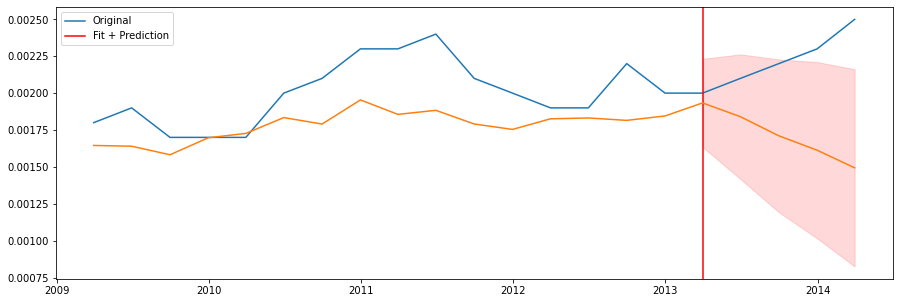

In [67]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_low_var

In [68]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.285
P-value for the series y_diff1: 0.01558
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-214.632, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-222.632, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-220.632, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-220.632, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-224.632, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-218.632, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.747 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316

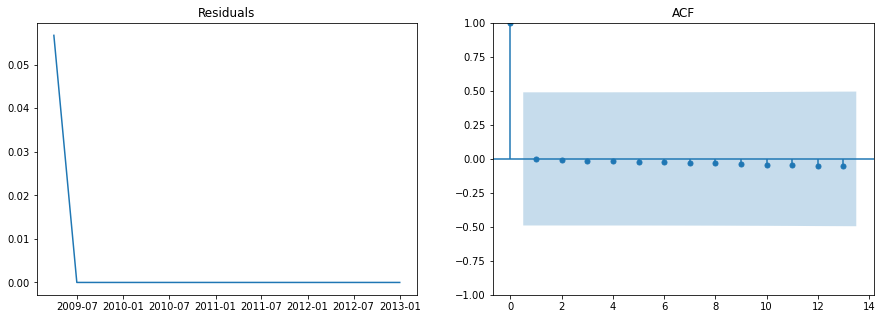


Test statistic for the residuals: -2.136
P-value for the residuals: 0.23009
The residuals are not stationary. We accept the hypothesis of a unit root.



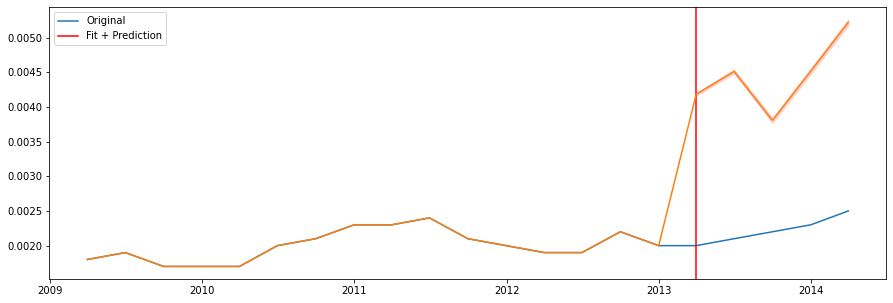

In [69]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_kbest

In [70]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.285
P-value for the series y_diff1: 0.01558
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-244.632, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-252.632, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-251.723, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-251.258, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-254.632, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-249.259, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.491 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316

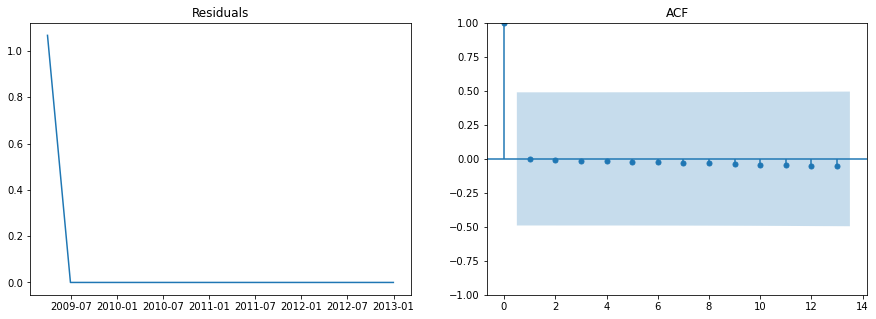


Test statistic for the residuals: -1526382422254.086
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



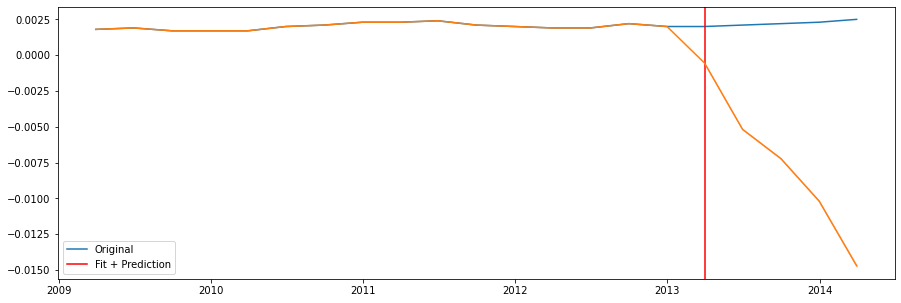

In [71]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_recur

In [72]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.285
P-value for the series y_diff1: 0.01558
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-254.632, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-262.632, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-260.632, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-260.632, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-264.632, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-258.632, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.389 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316

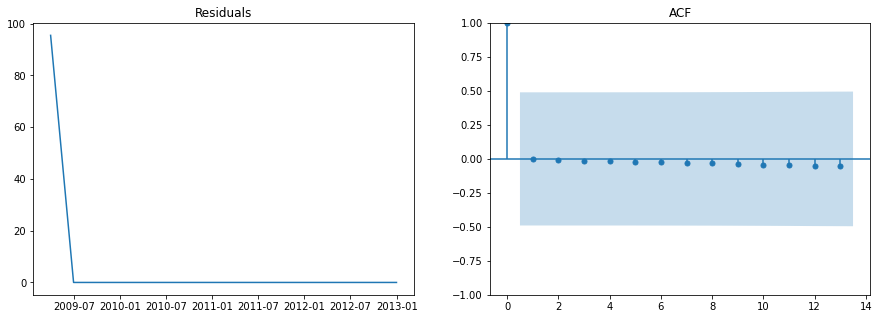


Test statistic for the residuals: -2.845
P-value for the residuals: 0.05216
The residuals are not stationary. We accept the hypothesis of a unit root.



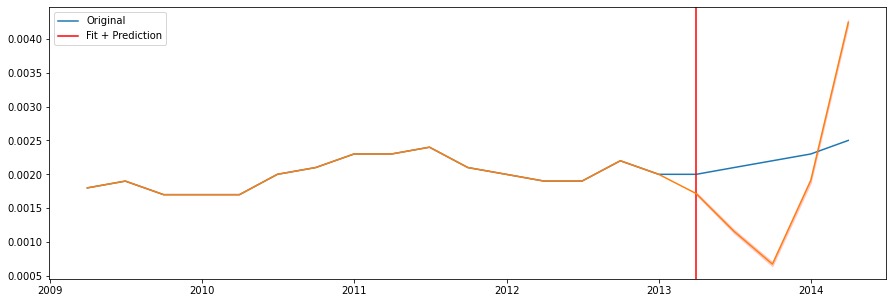

In [73]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_sfm

In [74]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.285
P-value for the series y_diff1: 0.01558
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-252.632, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-260.632, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-258.632, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-258.632, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-262.632, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-256.632, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.418 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316

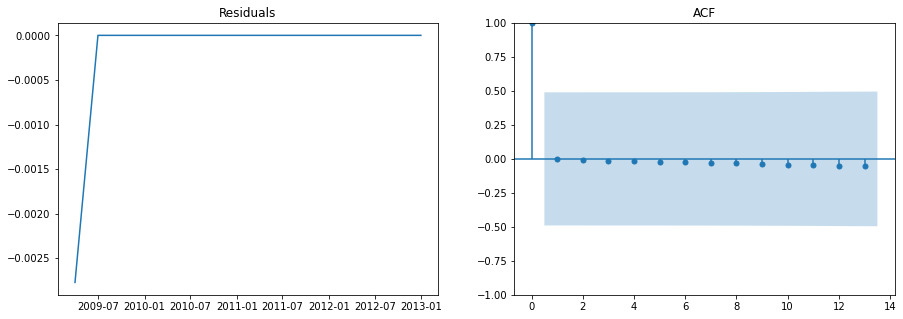


Test statistic for the residuals: -895677668333284.8
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



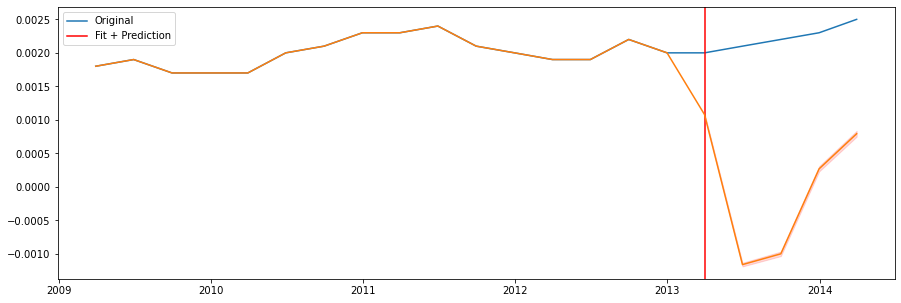

In [75]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_tree

In [76]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.285
P-value for the series y_diff1: 0.01558
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-201.165, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-214.162, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-212.451, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-210.749, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.492, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-208.190, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.389 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 123.081

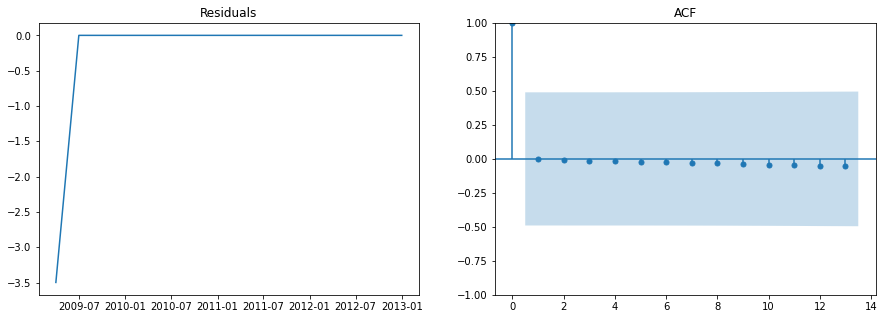


Test statistic for the residuals: -2.062
P-value for the residuals: 0.26012
The residuals are not stationary. We accept the hypothesis of a unit root.



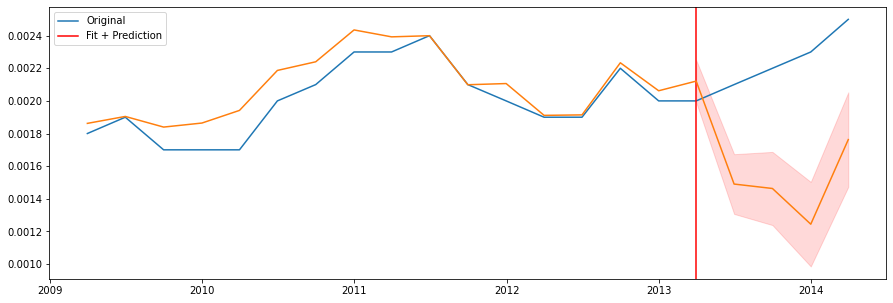

In [77]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_for

In [78]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.285
P-value for the series y_diff1: 0.01558
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-201.969, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.469, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-209.468, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-208.945, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-186.178, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-206.885, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.762 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 127.735

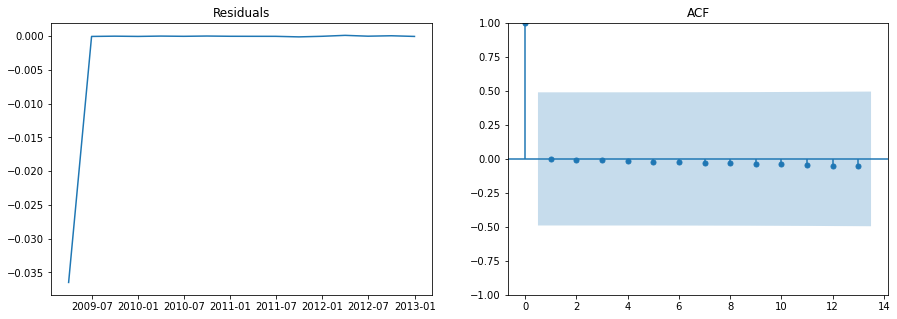


Test statistic for the residuals: -3.262
P-value for the residuals: 0.01667
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



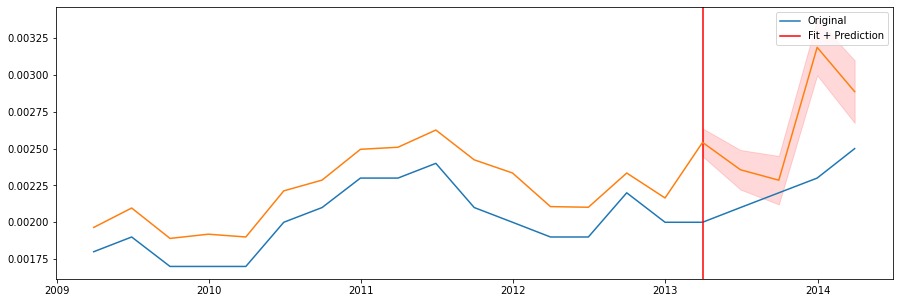

In [79]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_bac

In [80]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_2_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.285
P-value for the series y_diff1: 0.01558
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-244.632, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-252.632, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-250.632, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-250.632, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-254.632, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-248.632, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.489 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316

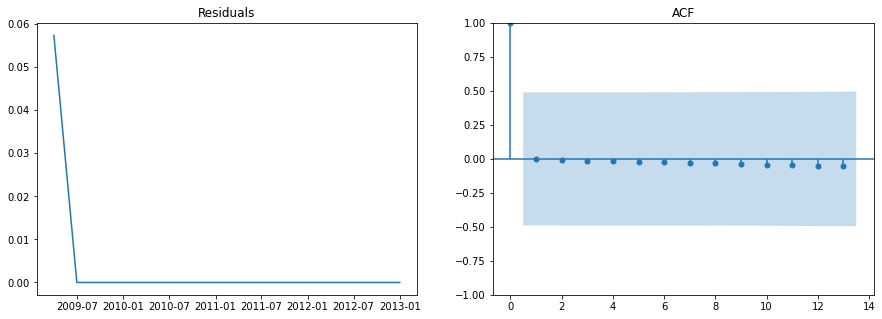


Test statistic for the residuals: -194231053246994.16
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



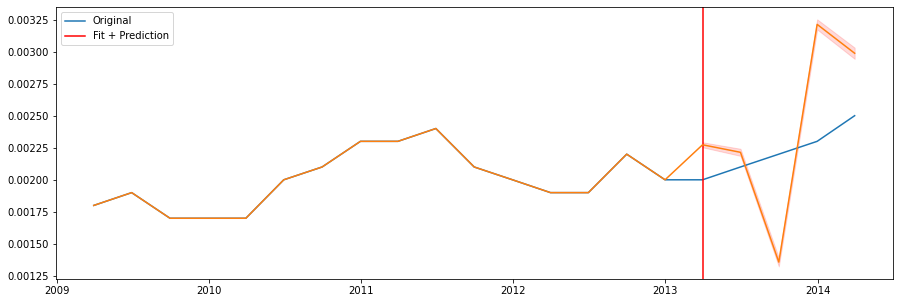

In [81]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

# Focus on chronique CHR8

In [94]:
start = 2
chronique =b"CHR8"
period = 36

## With col_totale_corr

In [95]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.33
P-value for the series y_diff1: 0.01359
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



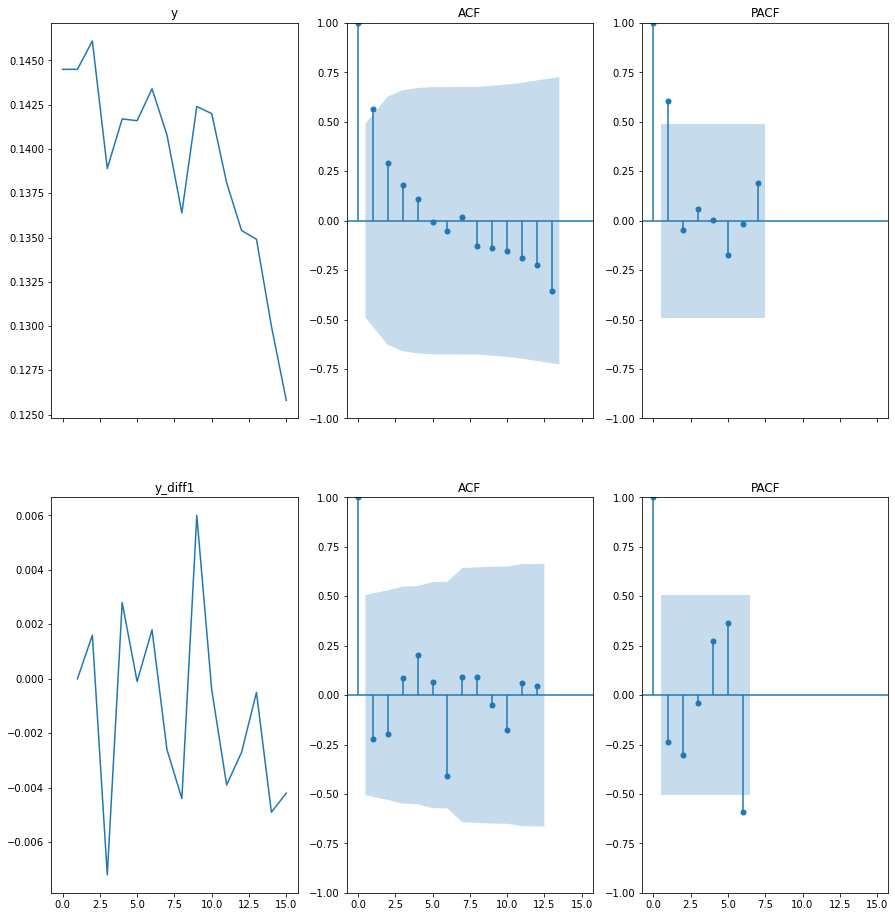

1

In [96]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff1: -3.33
P-value for the series y_diff1: 0.01359
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-117.919, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-126.216, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-127.439, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-127.268, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-101.183, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-131.289, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-130.151, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-130.840, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-125.289, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-127.285, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-131.210

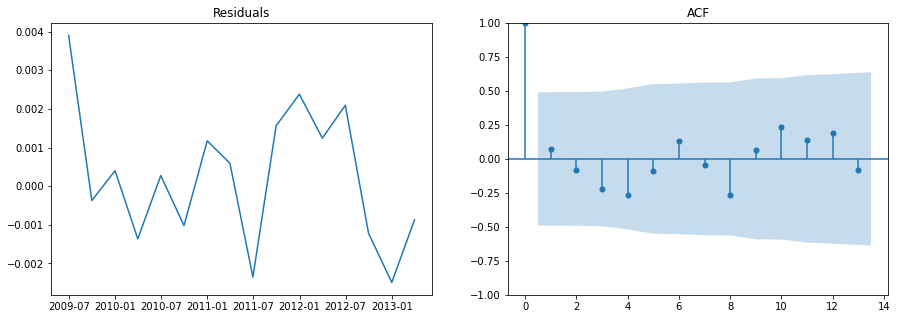


Test statistic for the residuals: -1.954
P-value for the residuals: 0.30714
The residuals are not stationary. We accept the hypothesis of a unit root.



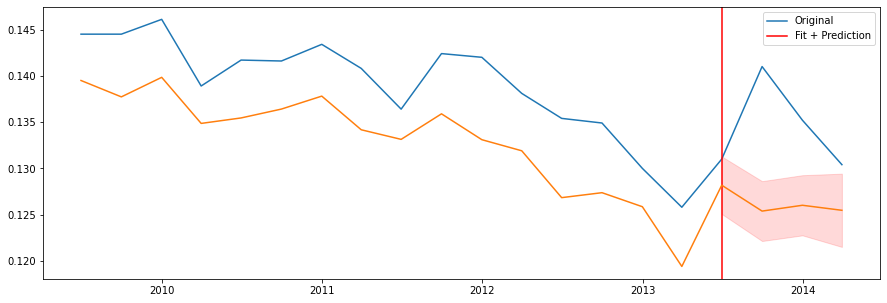

In [97]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

The best model is :

$$
ARIMA(1,5,0)
$$

## With col_totale_low_var

In [98]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.33
P-value for the series y_diff1: 0.01359
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-218.392, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-226.632, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-224.161, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-224.721, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-228.632, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-222.345, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.715 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316


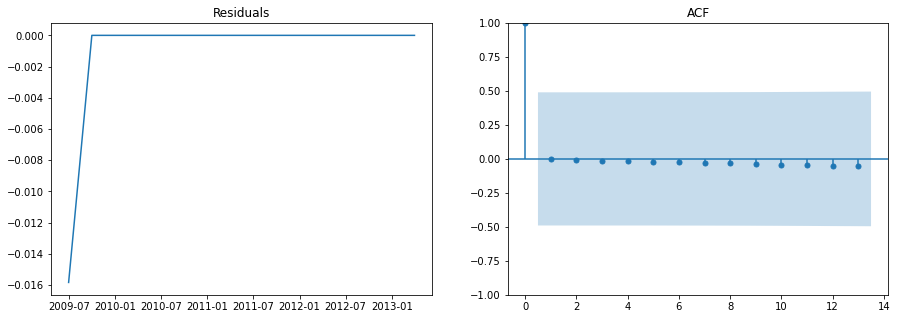


Test statistic for the residuals: -5.435
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



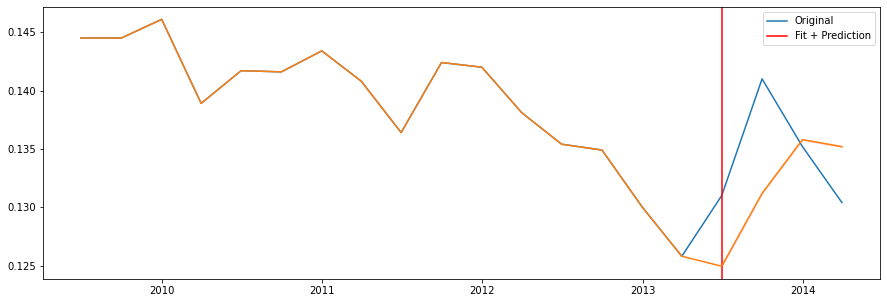

In [99]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_kbest

In [100]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.33
P-value for the series y_diff1: 0.01359
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-246.193, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-252.632, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-251.408, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-251.927, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-254.632, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-249.719, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.484 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316


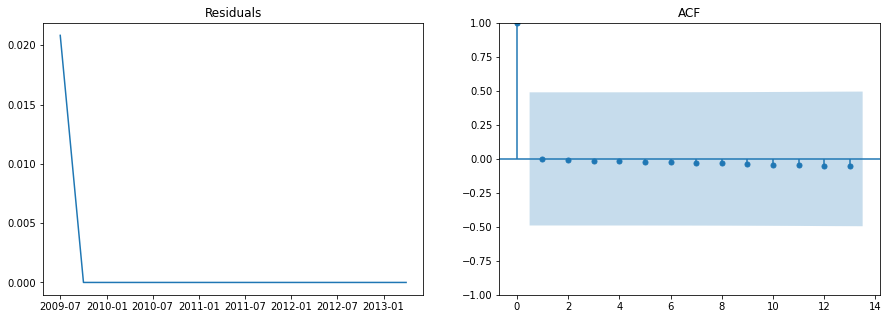


Test statistic for the residuals: -3752792295292.478
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



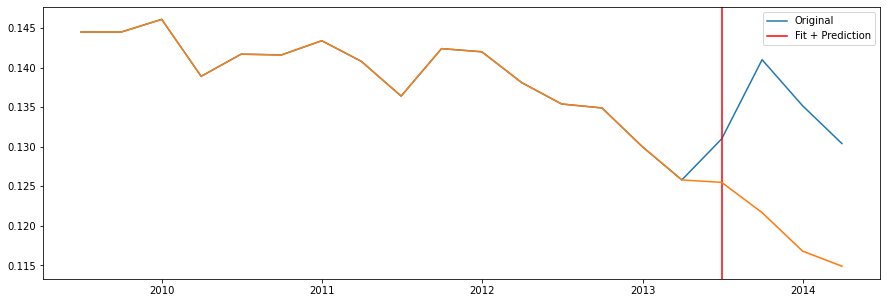

In [101]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_recur

In [102]:
X_train, X_test, y_train, y_test,X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.33
P-value for the series y_diff1: 0.01359
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-254.632, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-262.632, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-260.632, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-260.632, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-264.632, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-258.632, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.417 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316


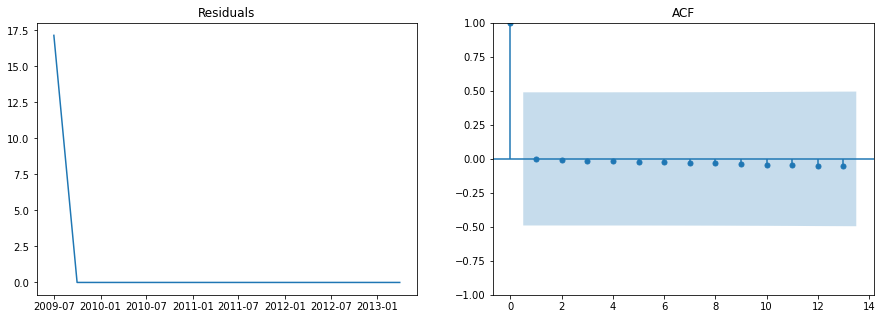


Test statistic for the residuals: -3.999
P-value for the residuals: 0.00141
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



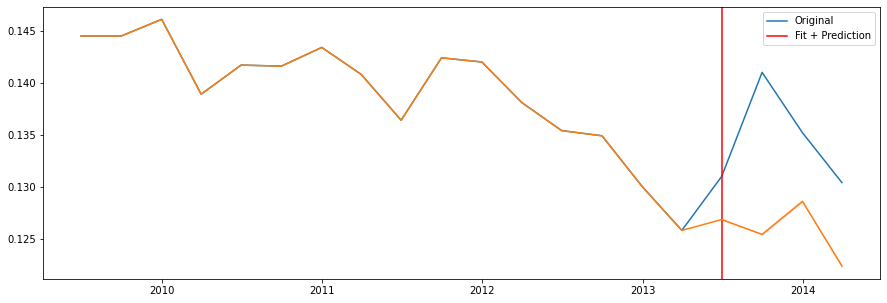

In [103]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_sfm

In [104]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.33
P-value for the series y_diff1: 0.01359
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.632, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-248.632, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-246.632, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-246.632, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-250.632, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-244.632, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.520 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316


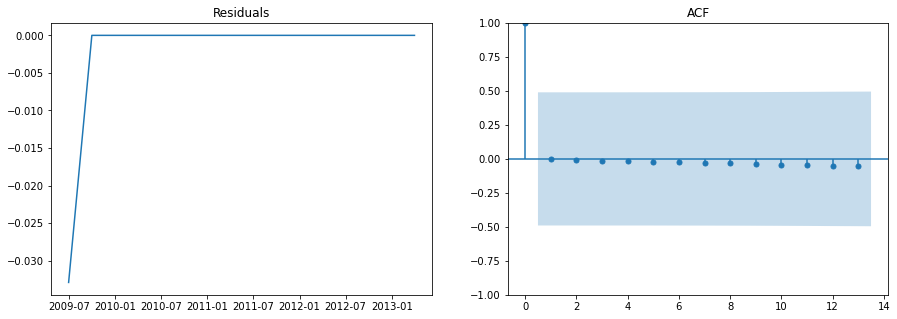


Test statistic for the residuals: -610021514771879.6
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



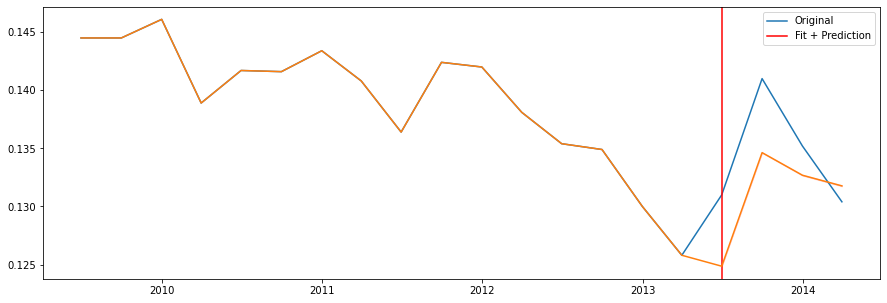

In [105]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_tree

In [106]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.33
P-value for the series y_diff1: 0.01359
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.632, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-248.632, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-247.600, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-247.487, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-250.632, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-245.497, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.533 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316


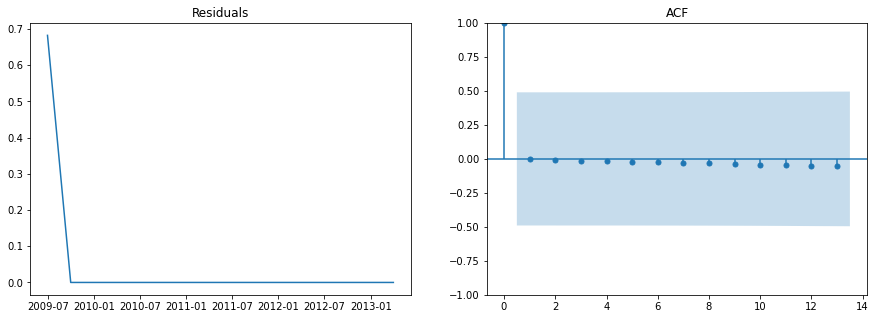


Test statistic for the residuals: -1334888935797.779
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



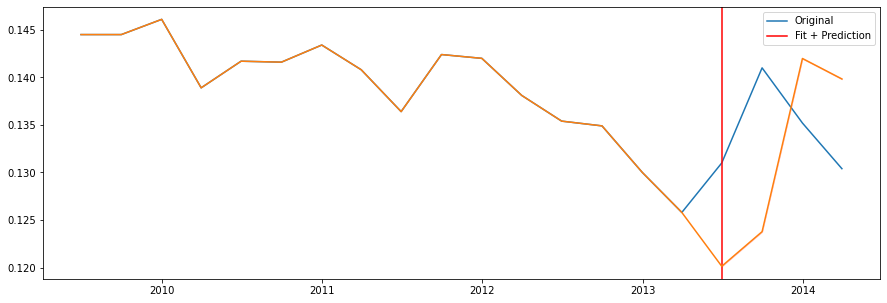

In [107]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_for

In [108]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.33
P-value for the series y_diff1: 0.01359
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-244.558, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-252.632, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-250.608, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-250.304, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-254.632, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-248.450, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.482 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316


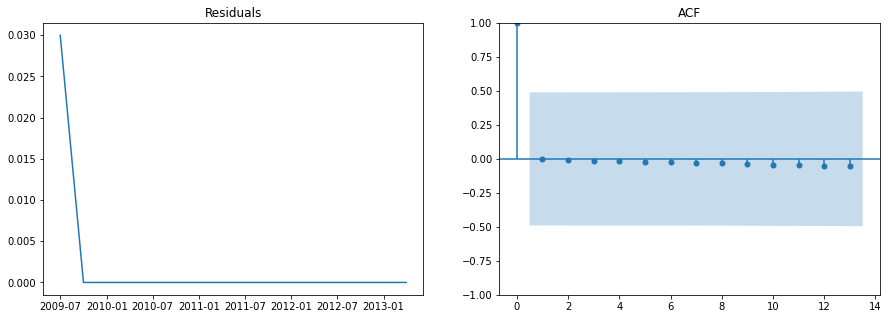


Test statistic for the residuals: -4.199
P-value for the residuals: 0.00066
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



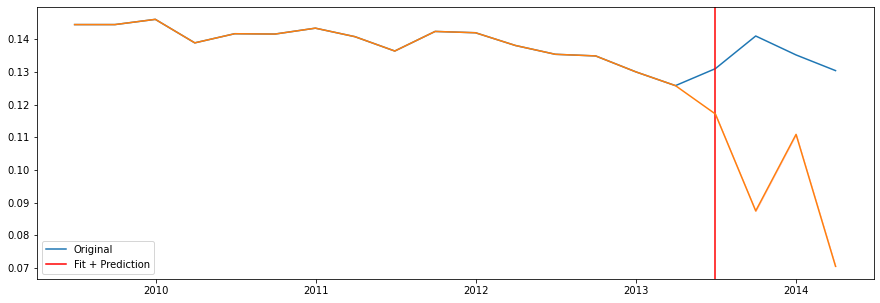

In [109]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$

## With col_totale_seq_bac

In [110]:
X_train, X_test, y_train, y_test, X_validation = clean_data(data,start,period=period,chronique=chronique,col_used=cl.col_8_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -3.33
P-value for the series y_diff1: 0.01359
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-244.632, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-252.632, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-249.700, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-249.588, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-254.632, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-247.514, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.489 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 148.316


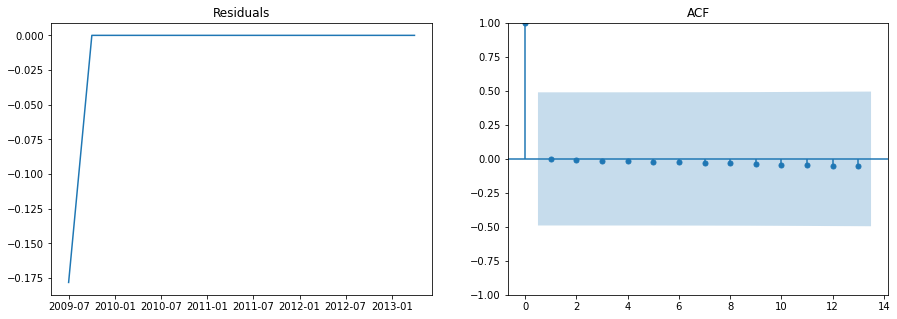


Test statistic for the residuals: -2.558
P-value for the residuals: 0.10202
The residuals are not stationary. We accept the hypothesis of a unit root.



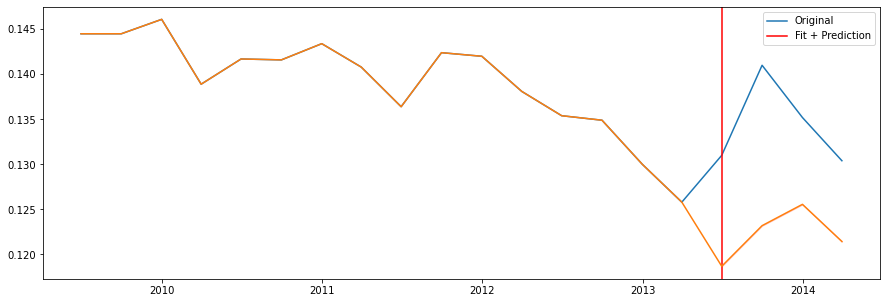

In [111]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

The best model is :

$$
ARIMA(0,1,0)
$$